In [1]:
import json
import urllib2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
# Pulling zip polygons from web
url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson"
req = urllib2.urlopen(url)
zippoly = json.load(req)
nycZips = []

for z in zippoly['features']:
    nycZips.append(str(z['properties']['postalCode']))

print len(nycZips)

262


In [ ]:
#from StringIO import StringIO

# To specify filenames
#year = ['94', '95', '96', '97', '98', '99','00', 
#        '01', '02', '03', '04', '05', '06', '07', 
#        '08', '09', '10', '11', '12', '13']

In [3]:
d = {}
#for y in year:
for i in range(1994, 2014):
    if i in range(1998, 2003):
        #url = "https://dl.dropboxusercontent.com/u/58178372/zbp%stotals.zip" % year
        #myFile = StringIO(urllib2.urlopen(url).read())
        #zf = zipfile.ZipFile(myFile, 'r')
        fname = 'zbp' + str(i)[2:] + 'totals.zip'
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip', '.txt')))
        df = df.rename(columns = {'ZIP': 'zip', 'EST': str(i)}) # standardizing col names
        df = df[(df.zip.astype(str).isin(nycZips))]
        d['{}'.format(i)] = df[['zip', str(i)]]
    else:
        #url = "https://dl.dropboxusercontent.com/u/58178372/zbp%stotals.zip" % year
        #myFile = StringIO(urllib2.urlopen(url).read())
        #zf = zipfile.ZipFile(myFile, 'r')
        fname = 'zbp' + str(i)[2:] + 'totals.zip'
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
        df = df.rename(columns={'est': str(i)})
        df = df[(df.zip.astype(str).isin(nycZips))]
        d['{}'.format(i)] = df[['zip', str(i)]]

In [4]:
# To merge data on zips
dFrames = [d['1994'], d['1995'], d['1996'], d['1997'], 
       d['1998'], d['1999'], d['2000'], d['2001'], d['2002'],
       d['2003'], d['2004'], d['2005'], d['2006'], d['2007'],
        d['2008'], d['2009'], d['2010'], d['2011'], d['2012'],
       d['2013']]

dfClean = reduce(lambda left, right: pd.merge
                 (left, right, on = 'zip', how = 'inner'), dFrames)

dfClean = dfClean.set_index('zip')
dfClean = dfClean.dropna()

print dfClean.shape # shows 230 x 20

(230, 20)


In [5]:
import random as rn
rn.seed((1,2))
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Mean = -0.00
Std Dev = 1.0


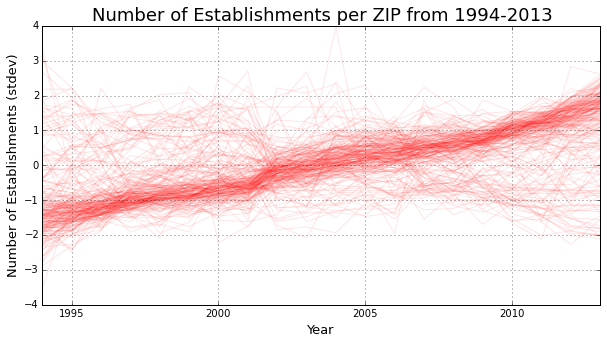

In [6]:
dfClean1 = dfClean

# Whitening the data
for i in range(len(dfClean1)):
    dfClean1.iloc[i] = (dfClean1.iloc[i]-np.mean(dfClean1.iloc[i]))/np.std(dfClean1.iloc[i])

#dfClean1copy = dfClean1.copy() # copying instead of just creating binding
    
print "Mean =", ("{0:.2f}".format(np.mean(dfClean1.iloc[i])))
print "Std Dev =", np.std(dfClean1.iloc[i])

pl.figure(figsize = (10,5)) # any larger opens scroll window
pl.xlim(1994, 2013)
plt.grid()
pl.xlabel("Year", fontsize = 13)
pl.ylabel("Number of Establishments (stdev)", fontsize = 13)
pl.title("Number of Establishments per ZIP from 1994-2013", fontsize = 18)

for i in range(len(dfClean1)):
    pl.plot(dfClean1.iloc[i].index, 
            dfClean1.iloc[i],'red', alpha=0.1) 

##K-means clustering

In [7]:
#from sklearn.cluster import KMeans

# Kmeans2 runs until converging on a local optimum,
# rather than KMeans, which runs until change is no
# longer detected. Trying kmeans2.
from scipy.cluster.vq import kmeans2

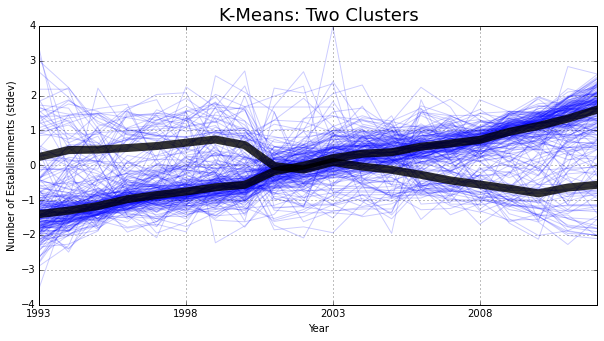

In [8]:
dfClean2 = dfClean1

ctr2, lab2 = kmeans2(np.asarray(dfClean2), 2, iter = 10, minit = 'points')

yr = np.arange(1994, 2014)

# Adding cluster column
dfClean2['cluster'] = lab2

# Plotting clusters
fig = pl.figure(figsize = (10,5)) # so it doesn't open scrolling frame

ax = fig.add_subplot(1,1,1)

for i in range(len(dfClean2)):
    cluster = int(dfClean2.cluster.iloc[i])
    pl.plot(dfClean2.iloc[i],'blue', alpha = 0.2)

for i in range(len(ctr2)):
    pl.plot(ctr2[i], alpha=0.8, linewidth = 8, 
            color = 'k') 

pl.title('K-Means: Two Clusters', size = 18)
pl.xlim(0,19) # for 20 years
ax.set_xticklabels(['1993', '1998', '2003','2008'])  
plt.grid()
pl.xlabel('Year')
pl.ylabel('Number of Establishments (stdev)')



##Four Clusters

In [9]:
colorlist = ['#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
         ]

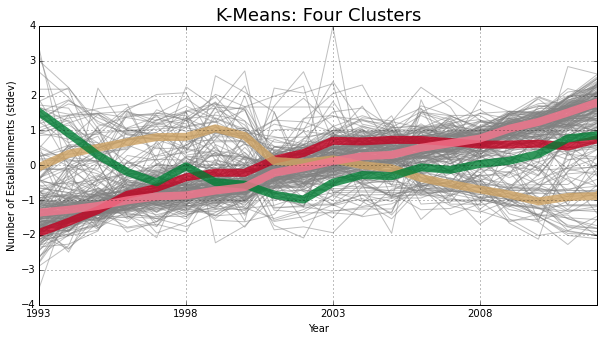

In [10]:
dfClean4 = dfClean1

ctr4, lab4 = kmeans2(np.asarray(dfClean4), 4, iter = 10, minit = 'points')

year = np.arange(1994, 2014)

#print ctr4[0], lab4, lab4.shape

# Adding cluster column
dfClean4['cluster'] = lab4

# Plotting
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(dfClean4)):
    cluster = int(dfClean4.cluster.iloc[i])
    pl.plot(dfClean4.iloc[i],'grey', alpha = 0.5)

for i in range(len(ctr4)):
    pl.plot(ctr4[i], alpha=0.8, linewidth = 8, 
            color = colorlist[i]) 

pl.title('K-Means: Four Clusters', size = 18)
pl.xlim(0,19) # for 20 years
ax.set_xticklabels(['1993', '1998', '2003','2008'])  
plt.grid()
pl.xlabel('Year')
pl.ylabel('Number of Establishments (stdev)')

##Seven Clusters

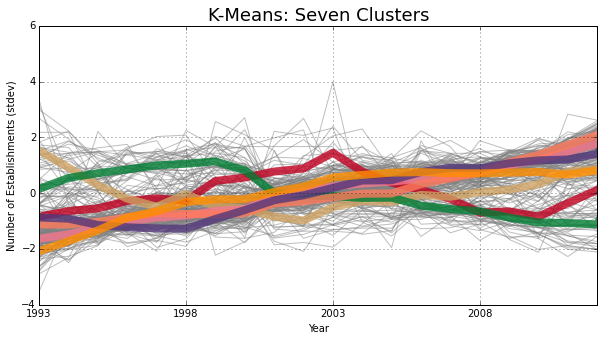

In [11]:
dfClean7 = dfClean1

ctr7, lab7 = kmeans2(np.asarray(dfClean7), 7, iter = 10, minit = 'points')

year = np.arange(1994, 2014)

# Adding column for 7 clusters
dfClean7['cluster'] = lab7

# Plotting
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(dfClean7)):
    cluster = int(dfClean7.cluster.iloc[i])
    pl.plot(dfClean7.iloc[i],'grey', alpha = 0.5)

for i in range(len(ctr7)):
    pl.plot(ctr7[i], alpha = 0.8, linewidth = 8, 
            color = colorlist[i]) 

pl.title('K-Means: Seven Clusters', size = 18)
pl.xlim(0,19) # for 20 years
ax.set_xticklabels(['1993', '1998', '2003','2008'])  
plt.grid()
pl.xlabel('Year')
pl.ylabel('Number of Establishments (stdev)')

In [12]:
import geopandas as gp
import matplotlib.patches as mptch
from descartes import PolygonPatch

In [13]:
kelly_colors_hex = [
    '#803E75', # Strong Purple
    '#817066', # Medium Gray
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    ]


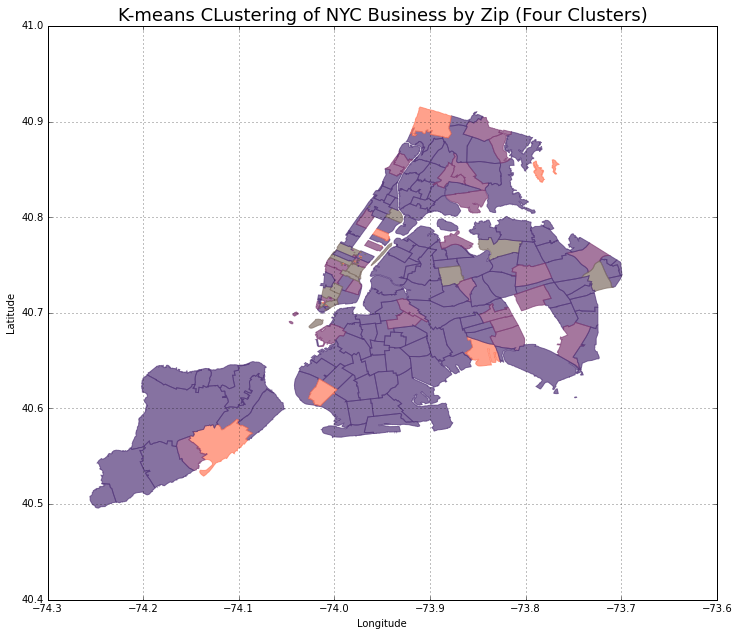

In [14]:
zipShapes = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')

# Converting col name to 'zip' for join
zipShapes.rename(columns = {'postalCode':'zip'}, inplace = True)

zipData4 = dfClean4
# Setting index
zipData4['zip'] = zipData4.index

zipShapes['zip'] = zipShapes['zip'].astype(float)
KSforjoin = pd.merge(zipData4, zipShapes, on = 'zip', how = 'inner')

# For symbolizing K-means results on map
KS4formap = (KSforjoin.join(pd.Series(lab4, name = 'Cluster'))).dropna()

fig = plt.figure(figsize = (12,12))

for i in range(len(KS4formap)):
    ax = fig.add_subplot(111)
    #get polygon x, y coordinates
    poly = KS4formap['geometry'][i]
    cluster = KS4formap['Cluster'][i]
    ax.add_patch(PolygonPatch(poly,
                              fc=kelly_colors_hex[int(cluster)],
                              ec=kelly_colors_hex[int(cluster)],
                              alpha = 0.7, label = i))

ax.axis('scaled') # will not plot without this--why?
ax.set_title('K-means CLustering of NYC Business by Zip (Four Clusters)', 
             size = 18)
ax.grid()
pl.xlabel('Longitude')
pl.ylabel('Latitude')

##DBSCAN with Euclidian distance of 2 miles

In [15]:
from sklearn.cluster import DBSCAN

In [20]:
dfClean1copy = dfClean1.copy() # copying instead of just creating binding
print dfClean1copy1

           1994      1995      1996      1997      1998      1999      2000  \
zip                                                                           
10001 -1.831632 -1.173250 -1.269418 -0.685012  0.054742 -0.100607  0.520787   
10002 -1.722813 -1.631907 -1.372173 -1.034519 -1.153997 -0.941015 -0.442326   
10003 -1.872528 -1.457250 -1.319968 -0.914985 -0.523731 -0.489411 -0.407041   
10004 -1.608897 -1.523770 -1.438643 -1.060302 -1.031926 -0.492790  0.084181   
10005 -2.885957 -2.304004 -0.417066 -0.223082  0.535220  0.041442  0.835014   
10006  1.563021  0.877893  0.494686  0.738545  1.203039  1.539797  1.632695   
10007 -0.412975 -0.689971 -0.857847 -0.580851 -0.622820 -0.446550 -0.245099   
10009 -1.738195 -1.744005 -1.511588 -1.081615 -0.855007 -0.750419 -0.425034   
10010 -0.553445 -1.003514 -0.412798  0.754570  1.317157  1.190575  2.034455   
10011 -2.187392 -1.968260 -1.676083 -0.838884 -0.512995 -0.147774 -0.209581   
10012 -2.604785 -1.998669 -1.719855 -0.840987 -0.325

In [27]:
dfAgain = dfClean1copy.drop(dfClean1copy.columns[[-1]], axis = 1)
print dfAgain

           1994      1995      1996      1997      1998      1999      2000  \
zip                                                                           
10001 -1.831632 -1.173250 -1.269418 -0.685012  0.054742 -0.100607  0.520787   
10002 -1.722813 -1.631907 -1.372173 -1.034519 -1.153997 -0.941015 -0.442326   
10003 -1.872528 -1.457250 -1.319968 -0.914985 -0.523731 -0.489411 -0.407041   
10004 -1.608897 -1.523770 -1.438643 -1.060302 -1.031926 -0.492790  0.084181   
10005 -2.885957 -2.304004 -0.417066 -0.223082  0.535220  0.041442  0.835014   
10006  1.563021  0.877893  0.494686  0.738545  1.203039  1.539797  1.632695   
10007 -0.412975 -0.689971 -0.857847 -0.580851 -0.622820 -0.446550 -0.245099   
10009 -1.738195 -1.744005 -1.511588 -1.081615 -0.855007 -0.750419 -0.425034   
10010 -0.553445 -1.003514 -0.412798  0.754570  1.317157  1.190575  2.034455   
10011 -2.187392 -1.968260 -1.676083 -0.838884 -0.512995 -0.147774 -0.209581   
10012 -2.604785 -1.998669 -1.719855 -0.840987 -0.325

In [26]:
dbScan = DBSCAN(eps = 2, min_samples = 2).fit(dfAgain)

IndexError: indices are out-of-bounds